In [270]:
import pandas as pd
import numpy as np

from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

In [271]:
data = pd.read_csv("../data_sources/BankChurners.csv")

In [272]:
data.loc[(data['Attrition_Flag'] == 'Attrited Customer' ), ['Dependent_count'] ].value_counts()

Dependent_count
3                  482
2                  417
1                  269
4                  260
0                  135
5                   64
dtype: int64

In [273]:
data.loc[ (data['Gender'] == 'M') & (data['Attrition_Flag'] == 'Attrited Customer' ) ]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,0.99671,0.003294
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,0.99823,0.001771
99,711887583,Attrited Customer,47,M,2,Unknown,Married,$80K - $120K,Blue,37,...,5449.0,1628,3821.0,0.696,836,18,0.385,0.299,0.99700,0.002997
127,720201033,Attrited Customer,53,M,2,Graduate,Married,$80K - $120K,Blue,41,...,11669.0,2227,9442.0,0.622,720,23,0.353,0.191,0.99447,0.005530
144,767712558,Attrited Customer,59,M,1,College,Single,$60K - $80K,Blue,53,...,14979.0,0,14979.0,0.710,530,10,1.000,0.000,0.99639,0.003608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10112,708564858,Attrited Customer,33,M,2,College,Married,$120K +,Gold,20,...,34516.0,0,34516.0,1.004,9338,73,0.622,0.000,0.99438,0.005620
10113,713733633,Attrited Customer,27,M,0,High School,Divorced,$60K - $80K,Blue,36,...,13303.0,2517,10786.0,0.929,10219,85,0.809,0.189,0.99338,0.006620
10118,713755458,Attrited Customer,50,M,1,Unknown,Unknown,$80K - $120K,Blue,36,...,9959.0,952,9007.0,0.825,10310,63,1.100,0.096,0.99813,0.001874
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.99527,0.004729


In [274]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

# EXAMEN LIMPIEZA DE DATOS
*def: Un gerente comercial de una cartera de tarjetas de crédito de consumo se enfrenta al problema de la deserción de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán* \
1. Tratar variables nulas

In [275]:
data.select_dtypes('object').columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [276]:
data.select_dtypes('int64').columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [277]:
data.select_dtypes('float64').columns

Index(['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

- En caso de que la columna tenga mas del 90% de valores nulos excluir 

In [278]:
data.isnull().sum() ## Para ver resumen de las columnas con el conteo de valores nulos.

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [279]:
columns_valid = []
for column_ in data.columns:
    percentage = np.sum(pd.isna( data.loc[ : , column_ ] )) / data.shape[0]
    if percentage <= 0.9:
        columns_valid.append(column_)
    else:
        data = data.drop(columns=column_)

In [280]:
columns_valid ## Veremos la columnas validas (con menos del 90% de valores nulos)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

*Quitar columnas con un unico nivel (100% de representatividad), \
columnas con la totalidad de valores distintos (1% de representatividad) \
Columnas con más de un nivel y que al menos 1 nivel tengo más del 70% de representatividad*

In [281]:
columnsAnalisys = [] 
for c_ in data.columns:
    val = data.loc[ :, c_ ].drop_duplicates()
    if (val.shape[0] > 1) & (val.shape[0] < data.shape[0]):
        dfTmp = data.groupby(c_, as_index = False).agg({'CLIENTNUM': ['count']})
        dfTmp.columns = dfTmp.columns.droplevel(1)
        dfTmp['porcentage'] = dfTmp.apply(lambda r: ((r['CLIENTNUM'])/data.shape[0])*100, axis = 1)
        valR = dfTmp.loc[ dfTmp['porcentage'] >= 70, : ].shape[0]
        if valR == 0:
            columnsAnalisys.append(c_)

In [282]:
columnsAnalisys

['Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [283]:
columns_valid = ['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

### Nota: 
Se decidió retirar la columna "*Gender*" para evitar estratificar la data con un sesgo relacionado al genero de la persona, porque nos podría afectar directamente al resultado. Lo orientamos al analisis imparcial al genero, es decir, no buscamos obtener respuesta de si es una persona Masculina o femenina la que está en riesgo de deserción, simplemente si lo está o no.

Se retiraron las columnas "*Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1* y *Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2*" porque representan variables de respuestas o etiquetas

In [284]:
columns_valid.append('Attrition_Flag')
columns_valid.append('Card_Category')

### Nota:
Se deciden agregar las siguientes columnas:
- "*Attrition_Flag:* " Se decide agregar para estratificar los registros por "*Personas activas e inactivas*", considerando está columna como la que contiene las categorias más grandes por las que podemos estratificar al no tener una columna de fechas para orientar a otro punto de vista el analisis. A pesar que un único nivel representa el 84% del total de la data
- "*Card_Category:* " Se decide agregar porque la categoria de la tarjeta está orientada a la decisión del cliente y tendríamos la segunda categoría más grande de estratificación.

In [285]:
columns_valid

['Customer_Age',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Attrition_Flag',
 'Card_Category']

- Limpieza de valores númericas

In [286]:
## Attrition_Flag
## Tarjetas

In [287]:
data.loc[:, ['Attrition_Flag']].value_counts() / data.shape[0]

Attrition_Flag   
Existing Customer    0.83934
Attrited Customer    0.16066
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c84a2f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c84a54f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c84a2c40>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c84a5a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c84a5d60>],
 'means': []}

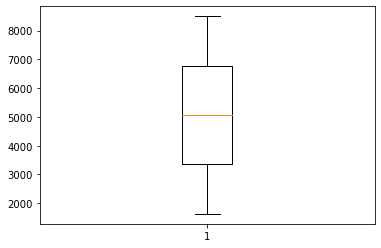

In [288]:
plt.boxplot(data.loc[:, ['Attrition_Flag']].value_counts())

Trabajamos ambos valores de "*Attrition_Flag*" porque el que representa el menor porcentaje, es un 16% y consideramos es demasiado información perdida.

In [289]:
data.loc[:, ['Card_Category']].value_counts()

Card_Category
Blue             9436
Silver            555
Gold              116
Platinum           20
dtype: int64

In [290]:
data.loc[:, ['Card_Category']].value_counts() / data.shape[0]

Card_Category
Blue             0.931767
Silver           0.054804
Gold             0.011455
Platinum         0.001975
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c8add4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c8adda60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c8add1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c8ae6040>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c8ae6310>],
 'means': []}

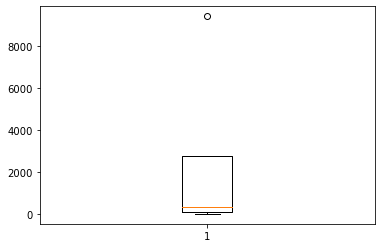

In [291]:
plt.boxplot(data.loc[:, ['Card_Category']].value_counts())

### Nota:
- Se decide excluir los valores *platinum* y *gold* de las categorias de tarjetas de credito, porque juntas representan menos del 2%

In [292]:
data = data.loc[ (data['Card_Category'] != 'Platinum') & (data['Card_Category'] != 'Gold'), : ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c84e12b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c84e1850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c84d6fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c84e1df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c84eb100>],
 'means': []}

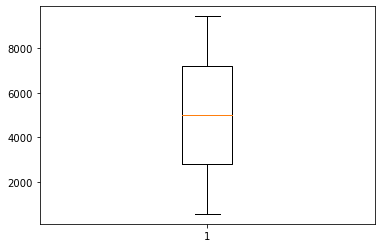

In [293]:
plt.boxplot(data.loc[:, ['Card_Category']].value_counts())

### ANALISIS PARA LA VARIABLE NUMERICA *CREDIT_LIMIT*

<AxesSubplot:xlabel='Card_Category', ylabel='Credit_Limit'>

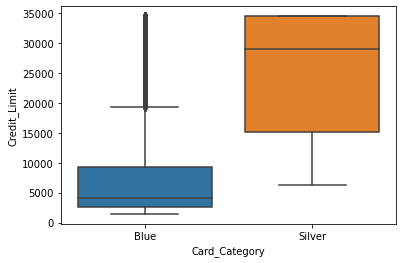

In [294]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer'), : ], x= 'Card_Category', y ='Credit_Limit' )

# Caso #1
- *Attrition_Flag:* Existing Customer
- *Card_Category:* Blue
- *Education_Level:* Uneducated
- *Marital_Status:* Married

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

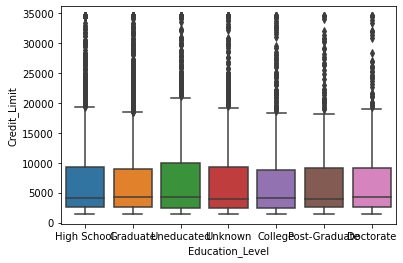

In [295]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

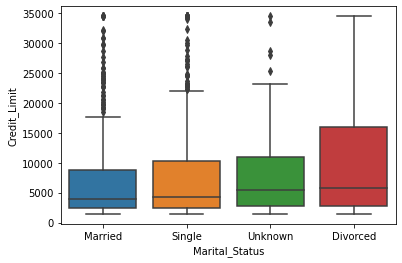

In [296]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Uneducated'), : ], x= 'Marital_Status', y ='Credit_Limit' )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

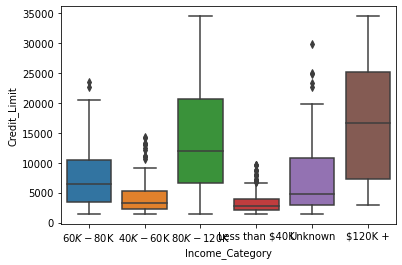

In [297]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married'), : ], x= 'Income_Category', y ='Credit_Limit' )

# Caso #2
- *Attrition_Flag:* Existing Customer
- *Card_Category:* Silver
- *Education_Level:* Uneducated
- *Marital_Status:* Married

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

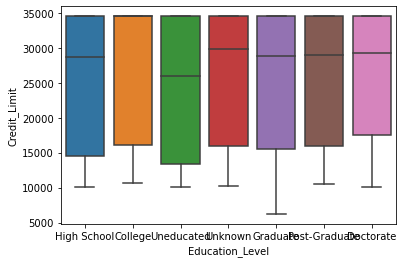

In [298]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Silver'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Marital_Status', ylabel='Credit_Limit'>

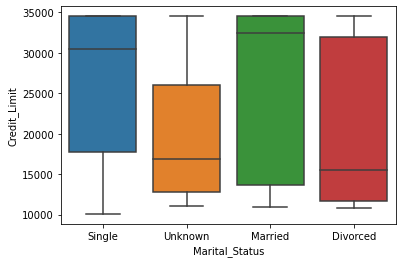

In [299]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Silver') & (data['Education_Level'] == 'Uneducated'), : ], x= 'Marital_Status', y ='Credit_Limit' )

<AxesSubplot:xlabel='Income_Category', ylabel='Credit_Limit'>

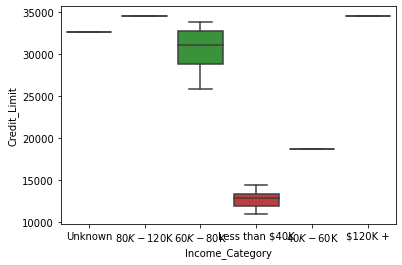

In [300]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Silver') & (data['Education_Level'] == 'Uneducated') & (data['Marital_Status'] == 'Married'), : ], x= 'Income_Category', y ='Credit_Limit' )

### ANALISIS DE CASO ESPECIFICO
*Def:* El caso seleccionado de los anteriormente vistos para la variable númerica "*Credit_Limit*", es el caso #1:
- *Attrition_Flag:* Existing Customer
- *Card_Category:* Blue
- *Education_Level:* Uneducated
- *Marital_Status:* Married
- *Income_Category:* Unknown *Categoría seleccionada para hacer el zoom*

In [400]:
Unknow_Income = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Graduate') & (data['Marital_Status'] == 'Married') & (data['Income_Category'] == 'Unknown'), ['Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1cb66f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1cb66f880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1cb65ffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1cb66fe20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1cb80e130>],
 'means': []}

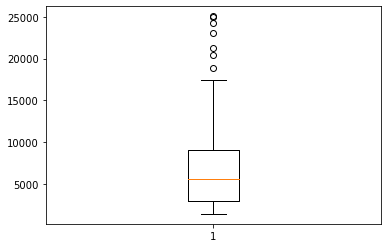

In [401]:
plt.boxplot(Unknow_Income)

In [373]:
q1 = np.quantile(Unknow_Income, .25)
q3 = np.quantile(Unknow_Income, .75)

In [374]:
iqr = q3 - q1

In [375]:
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [376]:
upper_bound

18270.875

### AUTOMATIZAR PARA CREDIT_LIMIT

In [379]:
dfq1 = data.loc[: , ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.25)
dfq1.columns = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit_Q1']

In [380]:
dfq3 = data.loc[: , ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], as_index = False).quantile(0.75)
dfq3.columns = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit_Q3']

In [381]:
dfmean = data.loc[: , ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit']].groupby(['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], as_index = False).mean()
dfmean.columns = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category','Credit_Limit_MEAN']

In [382]:
df_iqr = dfq1.merge(dfq3, on = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], how = 'inner').merge(dfmean, on = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], how = 'inner')

In [383]:
df_iqr.head(3)

,Attrition_Flag,Card_Category,Education_Level,Marital_Status,Income_Category,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN
0,Attrited Customer,Blue,College,Divorced,$120K +,34516.00,34516.0,34516.00
1,Attrited Customer,Blue,College,Divorced,$40K - $60K,3409.50,4076.5,3743.00
2,Attrited Customer,Blue,College,Divorced,$80K - $120K,6578.25,17977.0,14684.25


In [384]:
df_iqr['iqr'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q3'] - r['Credit_Limit_Q1']), axis = 1)

In [385]:
df_iqr.head(3)

,Attrition_Flag,Card_Category,Education_Level,Marital_Status,Income_Category,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN,iqr
0,Attrited Customer,Blue,College,Divorced,$120K +,34516.00,34516.0,34516.00,0.00
1,Attrited Customer,Blue,College,Divorced,$40K - $60K,3409.50,4076.5,3743.00,667.00
2,Attrited Customer,Blue,College,Divorced,$80K - $120K,6578.25,17977.0,14684.25,11398.75


In [386]:
df_iqr['upper_bound'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q3'] + (1.5*r['iqr'])), axis = 1)
df_iqr['lower_bound'] = df_iqr.apply(lambda r: (r['Credit_Limit_Q1'] - (1.5*r['iqr'])), axis = 1)

In [387]:
df_iqr.head(3)

,Attrition_Flag,Card_Category,Education_Level,Marital_Status,Income_Category,Credit_Limit_Q1,Credit_Limit_Q3,Credit_Limit_MEAN,iqr,upper_bound,lower_bound
0,Attrited Customer,Blue,College,Divorced,$120K +,34516.00,34516.0,34516.00,0.00,34516.000,34516.000
1,Attrited Customer,Blue,College,Divorced,$40K - $60K,3409.50,4076.5,3743.00,667.00,5077.000,2409.000
2,Attrited Customer,Blue,College,Divorced,$80K - $120K,6578.25,17977.0,14684.25,11398.75,35075.125,-10519.875


In [388]:
df_f = data.merge(df_iqr, on = ['Attrition_Flag','Card_Category','Education_Level','Marital_Status','Income_Category'], how='left').copy()

In [389]:
df_f.shape

(9991, 29)

In [390]:
def newCredit_Limit(r):
    if (r['Credit_Limit'] < r['lower_bound']) | (r['Credit_Limit'] > r['upper_bound']):
        return r['Credit_Limit_MEAN']
    else:
        return r['Credit_Limit']

In [391]:
df_f['new_Credit_Limit'] = df_f.apply( lambda r: newCredit_Limit(r), axis = 1 )

### COMPARACIONES

- Credit_limit vs new_Credit_Limit

In [406]:
prueba1 = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue') & (data['Education_Level'] == 'Graduate') & (data['Marital_Status'] == 'Married') & (data['Income_Category'] == 'Unknown'), ['Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c9d457c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c9d2b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1ca121be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1c9d2be50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1c9d461f0>],
 'means': []}

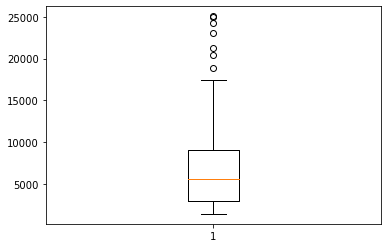

In [407]:
plt.boxplot(prueba1)

In [408]:
prueba2 = df_f.loc[ (df_f['Attrition_Flag'] == 'Existing Customer') & (df_f['Card_Category'] == 'Blue') & (df_f['Education_Level'] == 'Graduate') & (df_f['Marital_Status'] == 'Married') & (df_f['Income_Category'] == 'Unknown'), ['new_Credit_Limit']]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1c9d0ea90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1c9d147c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1c9d47eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1ca224eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1ca224100>],
 'means': []}

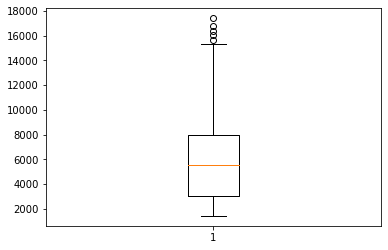

In [409]:
plt.boxplot(prueba2)

In [411]:
df_f['Customer_Age'].min()

26

<AxesSubplot:xlabel='Education_Level', ylabel='Credit_Limit'>

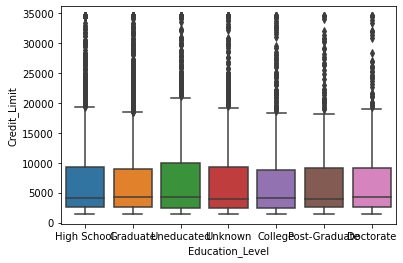

In [412]:
sns.boxplot(data = data.loc[ (data['Attrition_Flag'] == 'Existing Customer') & (data['Card_Category'] == 'Blue'), : ], x= 'Education_Level', y ='Credit_Limit' )

<AxesSubplot:xlabel='Education_Level', ylabel='new_Credit_Limit'>

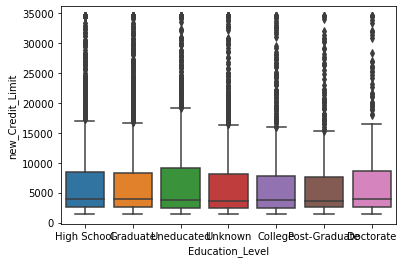

In [413]:
sns.boxplot(data = df_f.loc[ (df_f['Attrition_Flag'] == 'Existing Customer') & (df_f['Card_Category'] == 'Blue'), : ], x= 'Education_Level', y ='new_Credit_Limit' )

In [414]:
df_f.shape[0]

9991